# NEURAL NETWORK

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./framingham.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.isna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# checking for missing values
data.isna().sum()
null = data[data.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [6]:
# # Dropping all rows with missing data data = 
#data.dropna()
#data.isna().sum()
data.columns
#data = data.fillna(0)
data=data.bfill(axis="rows")

In [7]:
y_feature = data.columns[-1]

In [8]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
x_features = [
'sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male'
    
 ]

In [10]:
X = data[x_features]
y = data[y_feature]

In [11]:
heart_data = X
heart_data['TenYearCHD'] = y

C:\Users\user\AppData\Local\Temp/ipykernel_10004/3393353816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['TenYearCHD'] = y


In [12]:
heart_data.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


## Splitting : Training, Test sets

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1.0,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


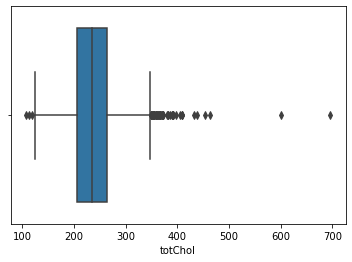

In [13]:
# Zooming into cholesterin outliers

sns.boxplot(data.totChol)
outliers = data[(data['totChol'] > 500)] 
outliers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totChol'>

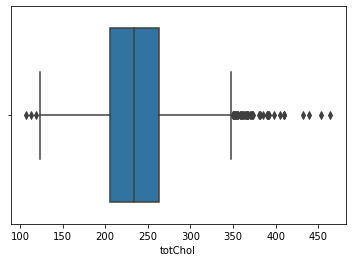

In [14]:
# Dropping 2 outliers in cholesterin
data = data.drop(data[data.totChol > 599].index)
sns.boxplot(data.totChol)

In [15]:
data_clean = data

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

heart_data_scaled = pd.DataFrame(scaler.fit_transform(heart_data[x_features]), columns=x_features)
heart_data_scaled['TenYearCHD'] = heart_data[y_feature] 

In [17]:
heart_data_scaled.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,-1.196267,-0.211652,-1.234283,-0.936101,-0.753511,-1.083027,-0.671241,-0.162437,-0.175006,1.153113,0
1,-0.515399,-0.253744,-0.417664,0.299123,-0.753511,-0.159355,-0.671241,-0.162437,-0.175006,-0.867217,0
2,-0.220356,-0.506296,-0.184345,0.186830,0.921046,-0.243325,-0.671241,-0.162437,-0.175006,1.153113,0
3,0.800946,0.882743,1.332233,-0.262342,1.758324,1.016227,1.489778,-0.162437,-0.175006,-0.867217,1
4,-0.106878,0.125085,-0.417664,1.085175,1.172229,0.092555,-0.671241,-0.162437,-0.175006,-0.867217,0


In [18]:
y = heart_data_scaled['TenYearCHD']
X = heart_data_scaled.drop(['TenYearCHD'], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=29)

In [21]:
# Print shapes of the samples
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3392, 10), (3392,), (848, 10), (848,))

# Resampling the imbalanced dataset

Class 0: 3595
Class 1: 643
Proportion: 5.59 : 1


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


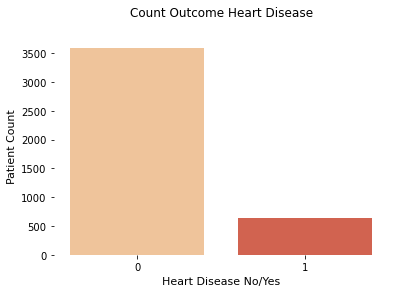

In [22]:
# Checking balance of outcome variable
target_count = data.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(data.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

# UNDERSAMPLING THE DATASET

In [23]:
# Describe train
#import numpy as np
#X_train_scaled.describe()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


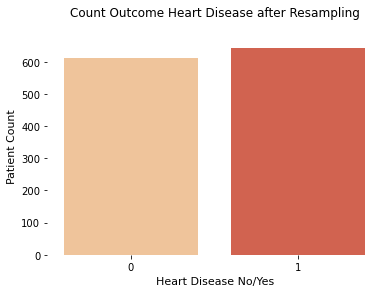

In [24]:
# Shuffle df
shuffled_heart_data = heart_data_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_heart_data = shuffled_heart_data.loc[shuffled_heart_data['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_heart_data = shuffled_heart_data.loc[shuffled_heart_data['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_heart_data = pd.concat([CHD_heart_data,non_CHD_heart_data])

# check new class counts
normalized_heart_data.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_heart_data.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [25]:
normalized_heart_data

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
328,2.571203,0.125085,1.098914,0.209289,-0.753511,2.359750,1.489778,-0.162437,-0.175006,-0.867217,1
2746,-0.515399,-0.464204,-0.534324,-0.599222,0.083767,-0.075385,-0.671241,-0.162437,-0.175006,-0.867217,1
4189,-0.696964,-0.211652,0.515614,0.546168,0.921046,-0.747146,-0.671241,-0.162437,-0.175006,1.153113,1
1407,-0.878529,-0.716757,-0.884303,-1.497566,-0.753511,-0.327296,-0.671241,-0.162437,-0.175006,-0.867217,1
4043,-0.946615,-0.464204,0.748934,1.332220,2.595602,-0.747146,-0.671241,-0.162437,-0.175006,1.153113,1
...,...,...,...,...,...,...,...,...,...,...,...
879,-0.220356,-0.506296,-0.067685,0.613544,-0.753511,-0.159355,-0.671241,-0.162437,-0.175006,1.153113,0
595,-0.606181,-0.674665,-0.650984,-0.868725,-0.753511,-0.075385,-0.671241,-0.162437,-0.175006,1.153113,0
387,-0.379225,0.082993,0.632274,1.601724,-0.753511,0.344466,1.489778,-0.162437,-0.175006,-0.867217,0
2260,-1.468614,0.209269,-0.534324,0.703379,-0.334872,-1.083027,-0.671241,-0.162437,-0.175006,-0.867217,0


In [26]:
X = normalized_heart_data[x_features]
y = normalized_heart_data[y_feature]

In [27]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=29)

## Model

In [28]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report
from keras import backend as k

In [29]:
from keras.backend import clear_session
clear_session()

In [30]:
np.random.seed(1234)

In [31]:
k.clear_session()
model=Sequential()
model.add(Dense(512,input_dim=10,activation='relu'))#input layer
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))#OUTPUT LAYER

In [32]:
# compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [33]:
# checkpoints
path = "model"
earlyStop = EarlyStopping(monitor="val_loss", mode='min', patience=5, verbose=1, restore_best_weights=True)
chck_point_path = os.path.join(path, f"HeartModel.h5")
checkpoint = ModelCheckpoint(chck_point_path, minitor='val_loss', verbose=1, mode='auto', save_best_only=True)

In [34]:
# convert dataframe to array
X_train_ = np.array(X_train)
# make y categorical
#y_train_ = to_categorical(np.array(y_train))

In [35]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(y_train)

In [36]:
# Fit the model
  

history = model.fit(X_train, ytrain, epochs=10, validation_split=0.1, callbacks=[earlyStop, checkpoint], batch_size=5)

Epoch 1/10
168/181 [==========================>...] - ETA: 0s - loss: 0.6605 - accuracy: 0.6143
Epoch 00001: val_loss improved from inf to 0.64600, saving model to model\HeartModel.h5
181/181 [==============================] - 2s 7ms/step - loss: 0.6532 - accuracy: 0.6202 - val_loss: 0.6460 - val_accuracy: 0.6436
Epoch 2/10
175/181 [============================>.] - ETA: 0s - loss: 0.6393 - accuracy: 0.6503
Epoch 00002: val_loss improved from 0.64600 to 0.62860, saving model to model\HeartModel.h5
181/181 [==============================] - 1s 6ms/step - loss: 0.6395 - accuracy: 0.6501 - val_loss: 0.6286 - val_accuracy: 0.6733
Epoch 3/10
167/181 [==========================>...] - ETA: 0s - loss: 0.6317 - accuracy: 0.6659
Epoch 00003: val_loss did not improve from 0.62860
181/181 [==============================] - 1s 3ms/step - loss: 0.6346 - accuracy: 0.6611 - val_loss: 0.6558 - val_accuracy: 0.5842
Epoch 4/10
173/181 [===========================>..] - ETA: 0s - loss: 0.6252 - accuracy:

In [37]:
ypred = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, np.argmax(ypred, axis=1)))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       125
           1       0.68      0.71      0.70       126

    accuracy                           0.69       251
   macro avg       0.69      0.69      0.69       251
weighted avg       0.69      0.69      0.69       251



In [39]:
confusion_matrix(y_test, np.argmax(ypred, axis=1))

array([[84, 41],
       [37, 89]], dtype=int64)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accruracy')
plt.legend()
plt.show()

# Applying the model

In [40]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    sysBP = input("Enter systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    glucose = input("Patient glucose level: >>> ") 
    my_predictors.append(glucose)
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    totChol = input("Patient's cholestrin level in mg/dl: >>> ") 
    my_predictors.append(totChol)
    cigsPerDay = input("Enter number of cigarettes smoked per day: >>> ")
    my_predictors.append(cigsPerDay)
    diaBP = input("Patient's diastolic pressure: >>> ") 
    my_predictors.append(diaBP)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(glucose)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    male = input("1 rep male,0 rep female >>> ") 
    my_predictors.append(male)
    
    
    my_data = dict(zip(parameters, my_predictors))
    my_data = pd.DataFrame(my_data, index=[0])
    #scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_data), columns=my_data.columns)
    my_y_pred = np.argmax(model.predict(my_df_scaled), axis=1)
    print('\n')
    print('Result:', my_y_pred)
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


In [ ]:
import pickle

In [ ]:
# #make pickle for our models
# pickle_out=open("HEART-DISEASE-NN.pkl","wb")
# pickle.dump(model, pickle_out)

In [ ]:
model.save("HEART-DISEASE.h5")